# Udacity - Blog - Seattle AirBnB Data Analysis
_____________________________

## CRISP DM
* Business understanding – What does the business need?
* Data understanding – What data do we have / need? Is it clean?
* Data preparation – How do we organize the data for modeling?
* Modeling – What modeling techniques should we apply?
* Evaluation – Which model best meets the business objectives?
* Deployment – How do stakeholders access the results?

The following Airbnb activity is included in this Seattle dataset:

* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day

### Business Understanding - AirBnb Seattle
1. For the Y2016, what are the counts of available listing count by month? Which month has the most listing?
2. Which neigborhood has the most Airbnb's listing available during the weekends? Top 10?
3. Is there a positive relationship between the number of reviews and price?

### Data Understanding

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as clndr
import seaborn as sns
%matplotlib inline

# Load Seattle AirBnB data
listings = pd.read_csv("Seattle Airbnb Open Data/listings.csv")
calendar = pd.read_csv("Seattle Airbnb Open Data/calendar.csv")
reviews = pd.read_csv("Seattle Airbnb Open Data/reviews.csv")

# Get data size
print("listings: {}, calendar: {}, reviews: {}".format(listings.shape, calendar.shape, reviews.shape))

listings: (3818, 92), calendar: (1393570, 4), reviews: (84849, 6)


In [2]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [3]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [4]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [5]:
# Understanding columns available and associated data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
# Understand amount of missing data in listings for each columns (% of missing data = Mean x 100%)
listings.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [7]:
# Understanding columns available and associated data
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
# Understand % of missing data in calendar for each columns (% of missing data = Mean x 100%)
calendar.isnull().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [9]:
# Understanding columns available and associated data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [10]:
# Understand % of missing data in calendar for each columns (% of missing data = Mean x 100%)
reviews.isnull().mean().sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

### Data Preparation

In [20]:
# Define functions for cleaning/prepping
def prepare_listings(df):
    # convert price information to float
    currency_columns = "price weekly_price monthly_price security_deposit cleaning_fee".split()
    if df[currency_columns[0]].dtype != float:
        df[currency_columns] = df[currency_columns].apply(lambda x: x.str.replace('[$,]','')).astype(float)
        
    # only extract desired columns
    df = df[["id", "neighbourhood_cleansed", "price"]]
    
    return df

def prepare_calendar(df):
    # filter to extract only desired data
    df = df[calendar["available"] == "t"] # getting only listings that are available
    
    # date conversion and extract month/day info
    df["date"] = df["date"].apply(lambda x: [int(i) for i in x.split("-")])
    df["date_month"] = df["date"].apply(lambda x: clndr.month_name[x[1]])
    df["date_day"] = df["date"].apply(lambda x: clndr.day_name[clndr.weekday(x[0], x[1], x[2])])
    df["date_year"] = df["date"].apply(lambda x: x[0])
    df = df[df["date_year"] == 2016] # only interested in Y2016 data
                                                                          
    return df

# Clean/Prep
listings = prepare_listings(listings)
calendar = prepare_calendar(calendar)

C:\Users\agoh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agoh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agoh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

### Data Modeling/Evaluation

In [34]:
calendar.head()

,listing_id,date,available,price,date_month,date_day,date_year
0,241032,"[2016, 1, 4]",t,$85.00,January,Monday,2016
1,241032,"[2016, 1, 5]",t,$85.00,January,Tuesday,2016
9,241032,"[2016, 1, 13]",t,$85.00,January,Wednesday,2016
10,241032,"[2016, 1, 14]",t,$85.00,January,Thursday,2016
14,241032,"[2016, 1, 18]",t,$85.00,January,Monday,2016


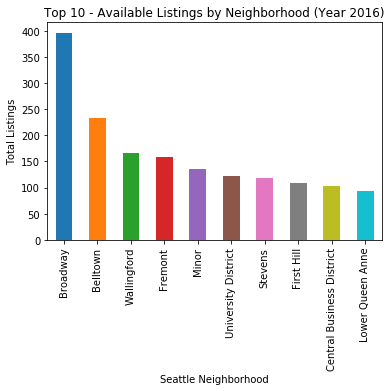

In [33]:
listings_neighborhood = listings.groupby("neighbourhood_cleansed")["id"].count().sort_values(ascending=False)
listings_neighborhood[:10].plot(kind="bar");
plt.xlabel('Seattle Neighborhood')
plt.ylabel('Total Listings')
plt.title("Top 10 - Available Listings by Neighborhood (Year 2016)");


In [40]:
listings_neighborhood = listings.groupby(["neighbourhood_cleansed", )["id"].count().sort_values(ascending=False)
listings_neighborhood[:10].plot(kind="line");
plt.xlabel('Seattle Neighborhood')
plt.ylabel('Total Listings')
plt.title("Top 10 - Available Listings by Neighborhood (Year 2016)");


SyntaxError: invalid syntax (<ipython-input-40-61bee69fa550>, line 1)

In [52]:
availability_breakdown = calendar[calendar["date_day"] == "Monday"].groupby("date_month")["listing_id"].count()
availability_breakdown

date_month
April        10130
August       12308
December     11231
February     12741
January       8396
July          9571
June         10328
March        10859
May          12925
November     10924
October      13308
September    10303
Name: listing_id, dtype: int64

In [61]:
list(clndr.month_name)[1:]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [62]:
month_order = list(clndr.month_name)[1:]
pivot = sites_data.pivot_table(values='Count', index=['Site',"Campaign"], columns=['Associated Year'], aggfunc=np.sum).fillna(0).astype(int)
pivot.reindex_axis(month_order, axis=1)
month_order = list(clndr.month_name)[1:]

# column_order = ['Gross Sales', 'Gross Profit', 'Profit Margin']
# # before pandas 0.21.0
# table3 = table2.reindex_axis(column_order, axis=1)
# # after pandas 0.21.0
# table3 = table2.reindex(column_order, axis=1)

NameError: name 'sites_data' is not defined

In [67]:
list(clndr.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [71]:
month_order = list(clndr.month_name)[1:]
day_order = list(clndr.day_name)
pivot = calendar.pivot_table(values="listing_id", index=["date_day"], columns=["date_month"], aggfunc=len)
pivot = pivot.reindex(day_order, axis=0)
pivot = pivot.reindex(month_order, axis=1)
pivot

date_month,January,February,March,April,May,June,July,August,September,October,November,December
date_day,,,,,,,,,,,,
Monday,8396,12741,10859,10130,12925,10328,9571,12308,10303,13308,10924,11231
Tuesday,8611,10155,13518,10144,12914,10357,9596,12310,10316,10625,13625,11236
Wednesday,8543,10154,13532,10120,10320,12920,9604,12346,10325,10630,13636,11245
Thursday,8367,10035,13521,10083,10277,12874,9598,9814,12860,10637,10879,14023
Friday,8262,10037,10808,12900,10308,10237,11940,9841,12880,10655,10896,14039
Saturday,8315,10009,10805,12573,10320,10237,11936,9859,10272,13282,10902,14064
Sunday,8745,10190,10895,10087,12907,10291,11977,9869,10290,13301,10918,11223


NameError: name 'count' is not defined

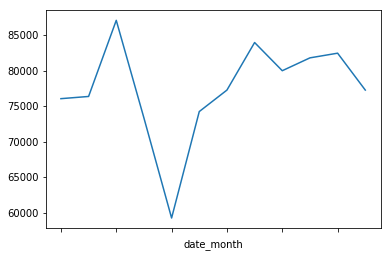

In [54]:
availability_breakdown = calendar.groupby(["date_month")["listing_id"].count()
availability_breakdown.plot(kind="line");

plt.plot(x="date_month", y=count("listing_id"),data = calendar)

NameError: name 'count' is not defined

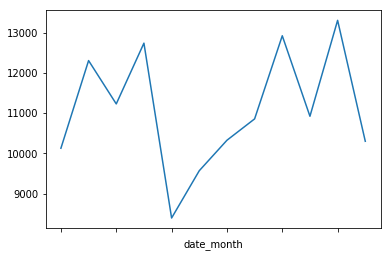

In [50]:
availability_breakdown = calendar[calendar["date_day"] == "Monday"].groupby("date_month")["listing_id"].count()
availability_breakdown.plot(kind="line");

plt.plot(x="date_month", y=count("listing_id"),data = calendar)
# l = plt.plot(x='months',y='distance',data=df1)
# plt.xticks(rotation=45)
# pivot = calendar.pivot_table(index=["date_day"], columns=["date_month"])
# pivot